In [38]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
train_dir= r'D:\Python_coding\Internshala_projects\cats_and_dogs\train'
validation_dir= r'D:\Python_coding\Internshala_projects\cats_and_dogs\validation'
test_dir= r'D:\Python_coding\Internshala_projects\cats_and_dogs\test'

# Data Pre- Processing

 1. Read the picture files
 2. Decode the Jpeg content to RBG grids of pixel
 3. Convert these into floating point tensor.
 4. Rescale the pixel values (between 0 and 255 ) to the [0,1] interval.

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [43]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating batches of tensor image data 

In [44]:
train_datagenerator = train_datagen.flow_from_directory( train_dir, target_size= (150,150), batch_size= 20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [45]:
validation_datagenerator = test_datagen.flow_from_directory( validation_dir, target_size = (150,150), batch_size= 20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [46]:
from keras.applications import VGG16
conv_base = VGG16(weights= 'imagenet',
                 include_top= False,
                 input_shape= (150,150,3))

In [47]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [48]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [49]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


# Compiling the model

Here we use features like SGD, RMSprop 

In [51]:
from tensorflow.keras import optimizers

In [52]:
model.compile(loss="binary_crossentropy",
              optimizer= optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [53]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5",
                                                save_best_only= True)

In [56]:
history = model.fit_generator(train_datagenerator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data= validation_datagenerator,
                             callbacks=[checkpoint_cb])


Epoch 1/30


C:\Users\Akash Sahlot\AppData\Local\Temp\ipykernel_7160\2043814134.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagenerator,


100/100 [==============================] - 466s 5s/step - loss: 0.7104 - acc: 0.5275 - val_loss: 0.6584 - val_acc: 0.6410
Epoch 2/30
100/100 [==============================] - 912s 9s/step - loss: 0.6345 - acc: 0.6390 - val_loss: 0.4545 - val_acc: 0.8260
Epoch 3/30
100/100 [==============================] - 900s 9s/step - loss: 0.5121 - acc: 0.7600 - val_loss: 0.7295 - val_acc: 0.6350
Epoch 4/30
100/100 [==============================] - 983s 10s/step - loss: 0.4531 - acc: 0.7900 - val_loss: 0.3139 - val_acc: 0.8730
Epoch 5/30
100/100 [==============================] - 962s 10s/step - loss: 0.3707 - acc: 0.8310 - val_loss: 0.2263 - val_acc: 0.9050
Epoch 6/30
100/100 [==============================] - 914s 9s/step - loss: 0.3537 - acc: 0.8480 - val_loss: 0.2052 - val_acc: 0.9100
Epoch 7/30
100/100 [==============================] - 887s 9s/step - loss: 0.3306 - acc: 0.8575 - val_loss: 0.2961 - val_acc: 0.8670
Epoch 8/30
100/100 [==============================] - 882s 9s/step - loss: 0.3

Plotting Graph

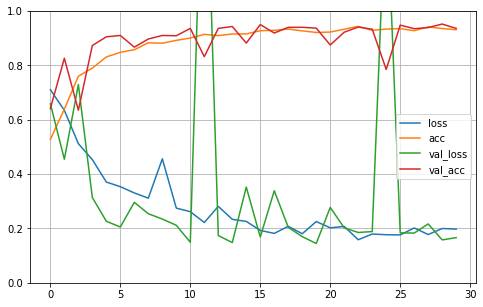

In [59]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [60]:
hist_df = pd.DataFrame(history.history)
hist_csv_file = 'history.csv'

In [61]:
with open (hist_csv_file, mode= 'w') as f:
    hist_df.to_csv(f)

In [62]:
test_generator= test_datagen.flow_from_directory(test_dir, 
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [63]:
model.evaluate_generator(test_generator, steps=50)

C:\Users\Akash Sahlot\AppData\Local\Temp\ipykernel_7160\421928545.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, steps=50)


[0.1861032098531723, 0.9229999780654907]